Importing the PIMA Indians Diabetes Database 
loading the dataset

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv("C:/Users/dell/Documents/GitHub/Diabetes-Prediction-Model/Data/Raw/diabetes.csv")

#display some info
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Cleaning & Preprocessing;

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("C:/Users/dell/Documents/GitHub/Diabetes-Prediction-Model/Data/Raw/diabetes.csv")

# Columns where 0 is unrealistic
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_to_fix:
    df['BloodPressure'] = df['Glucose'].fillna(0).astype(int)    # Replace 0 with NaN
    df.loc[:, col] = df[col].fillna(df[col].median())  # Fill NaN with median

# Define features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save processed data
train_data = pd.DataFrame(X_train, columns=X.columns)
train_data["Outcome"] = y_train.values
train_data.to_csv("C:/Users/dell/Documents/GitHub/Diabetes-Prediction-Model/Data/Processed/cleaned_data.csv", index=False)

test_data = pd.DataFrame(X_test, columns=X.columns)
test_data["Outcome"] = y_test.values
test_data.to_csv("C:/Users/dell/Documents/GitHub/Diabetes-Prediction-Model/Data/Processed/test_data.csv", index=False)

print("✅ Preprocessing complete. Cleaned dataset saved!")


✅ Preprocessing complete. Cleaned dataset saved!


Vizualizations :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

<Figure size 1200x800 with 0 Axes>

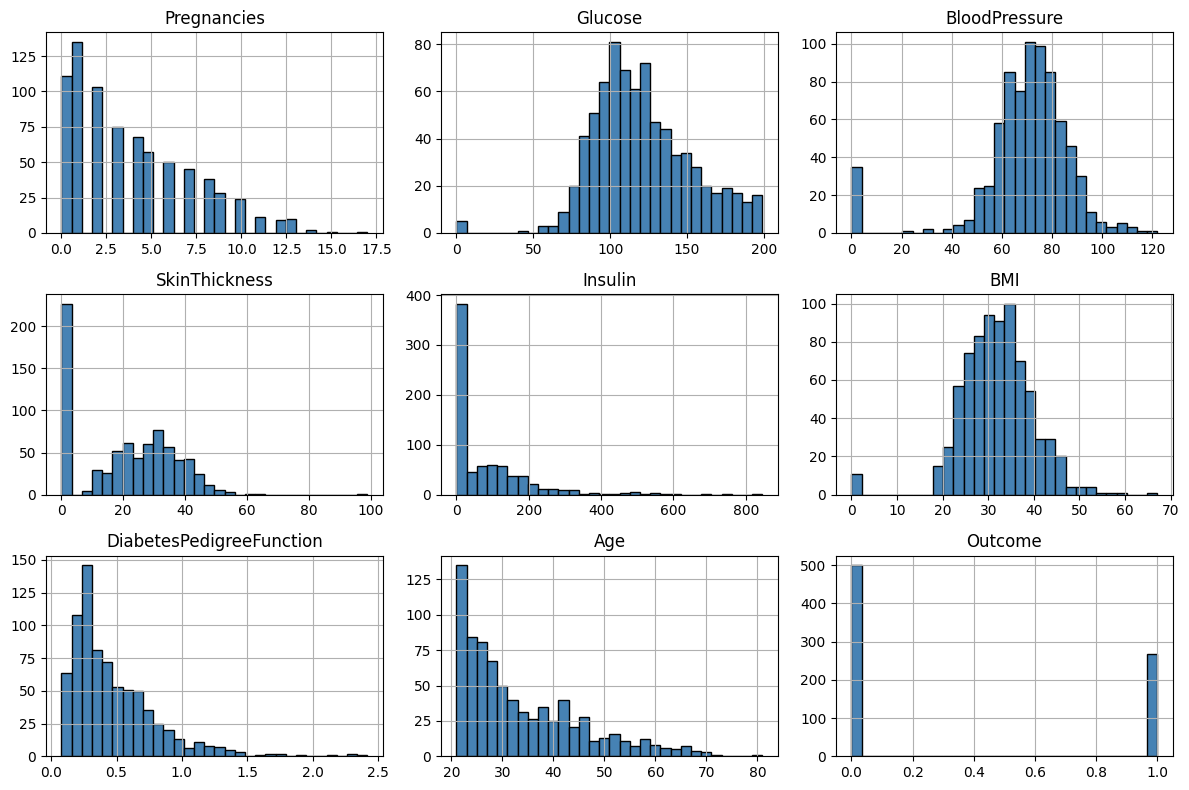

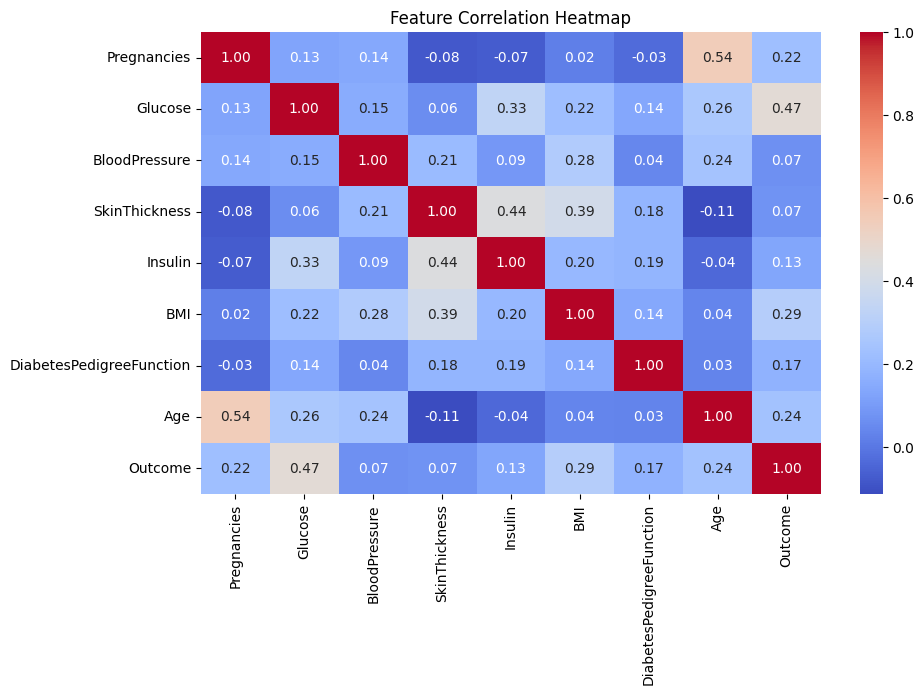

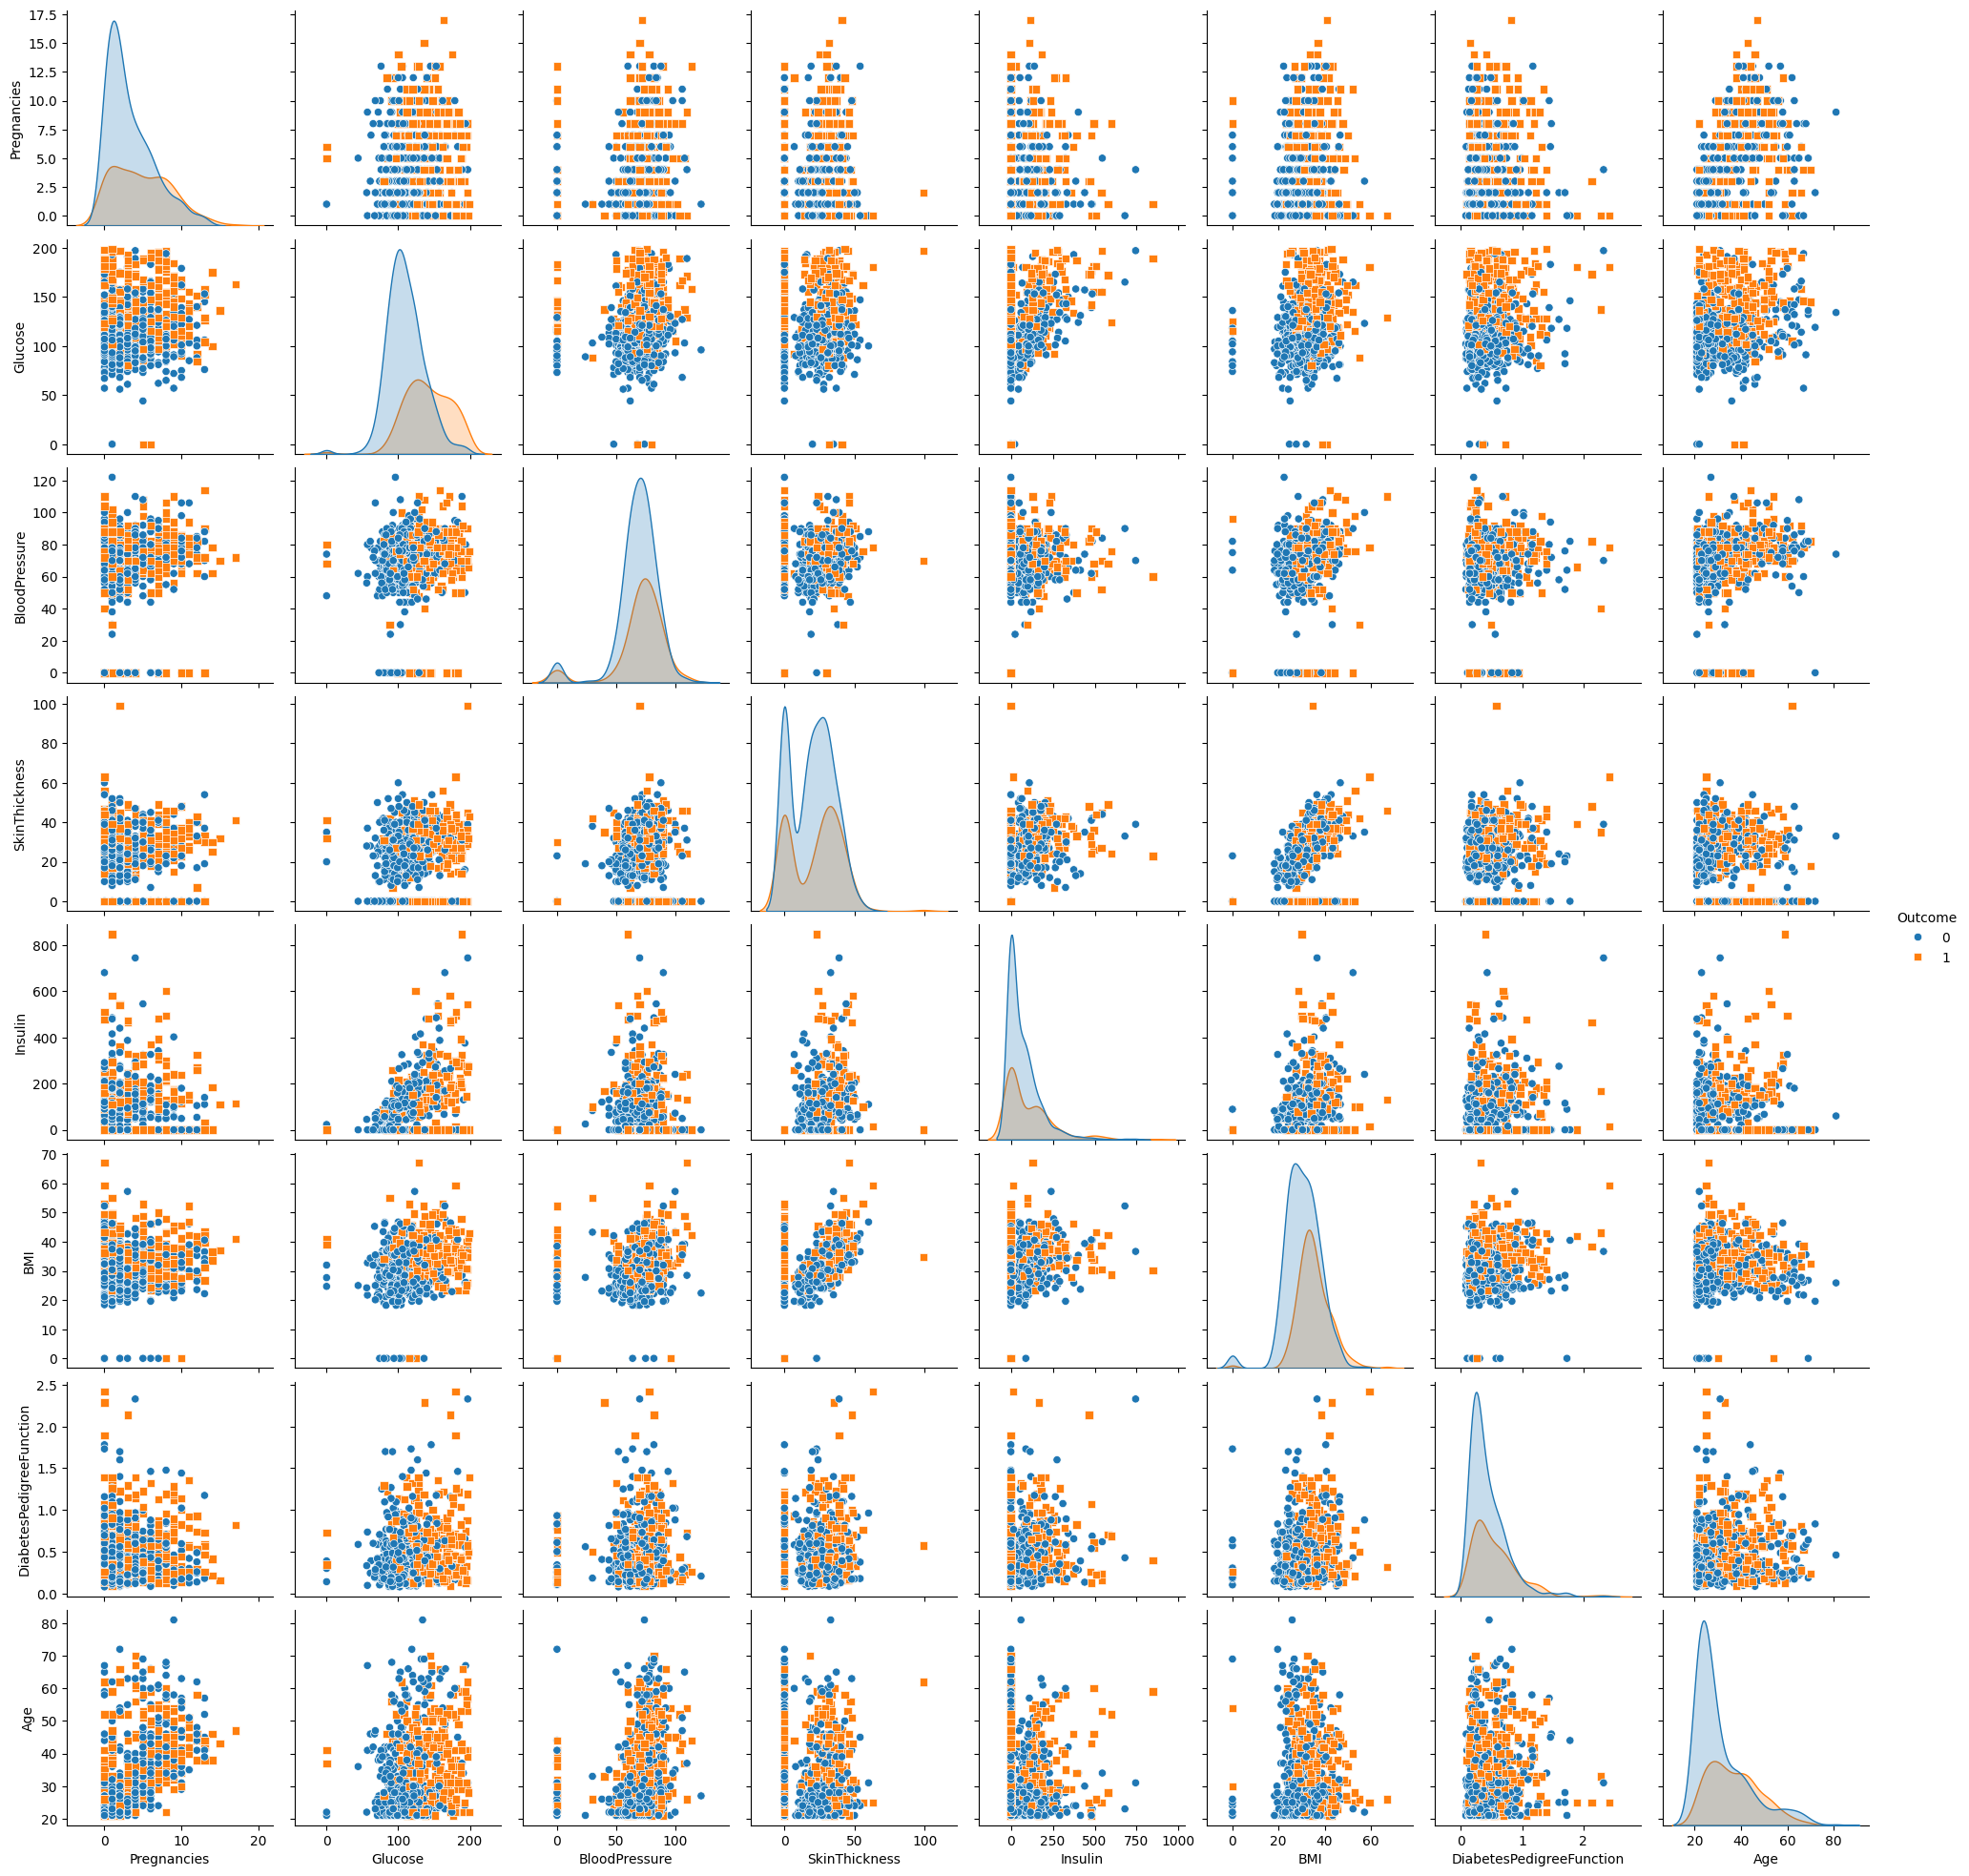

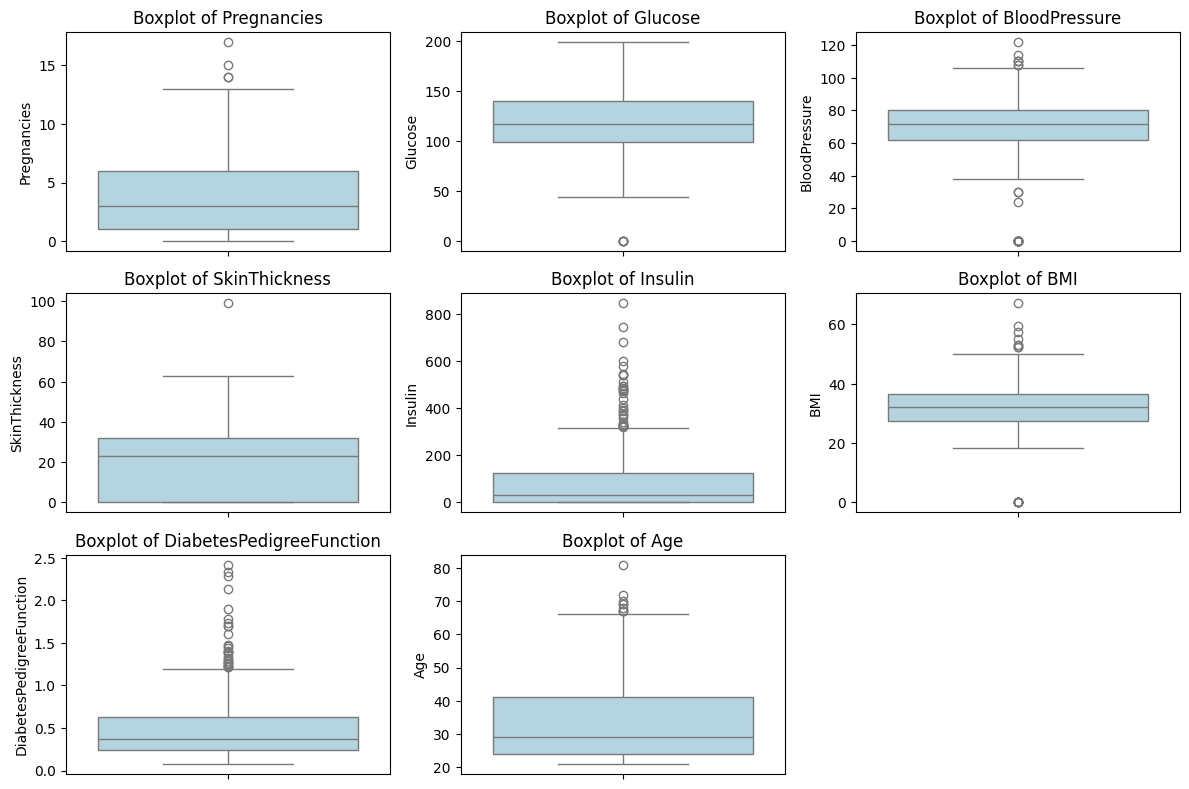

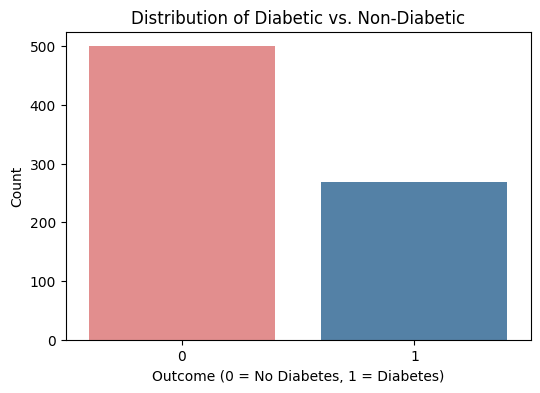

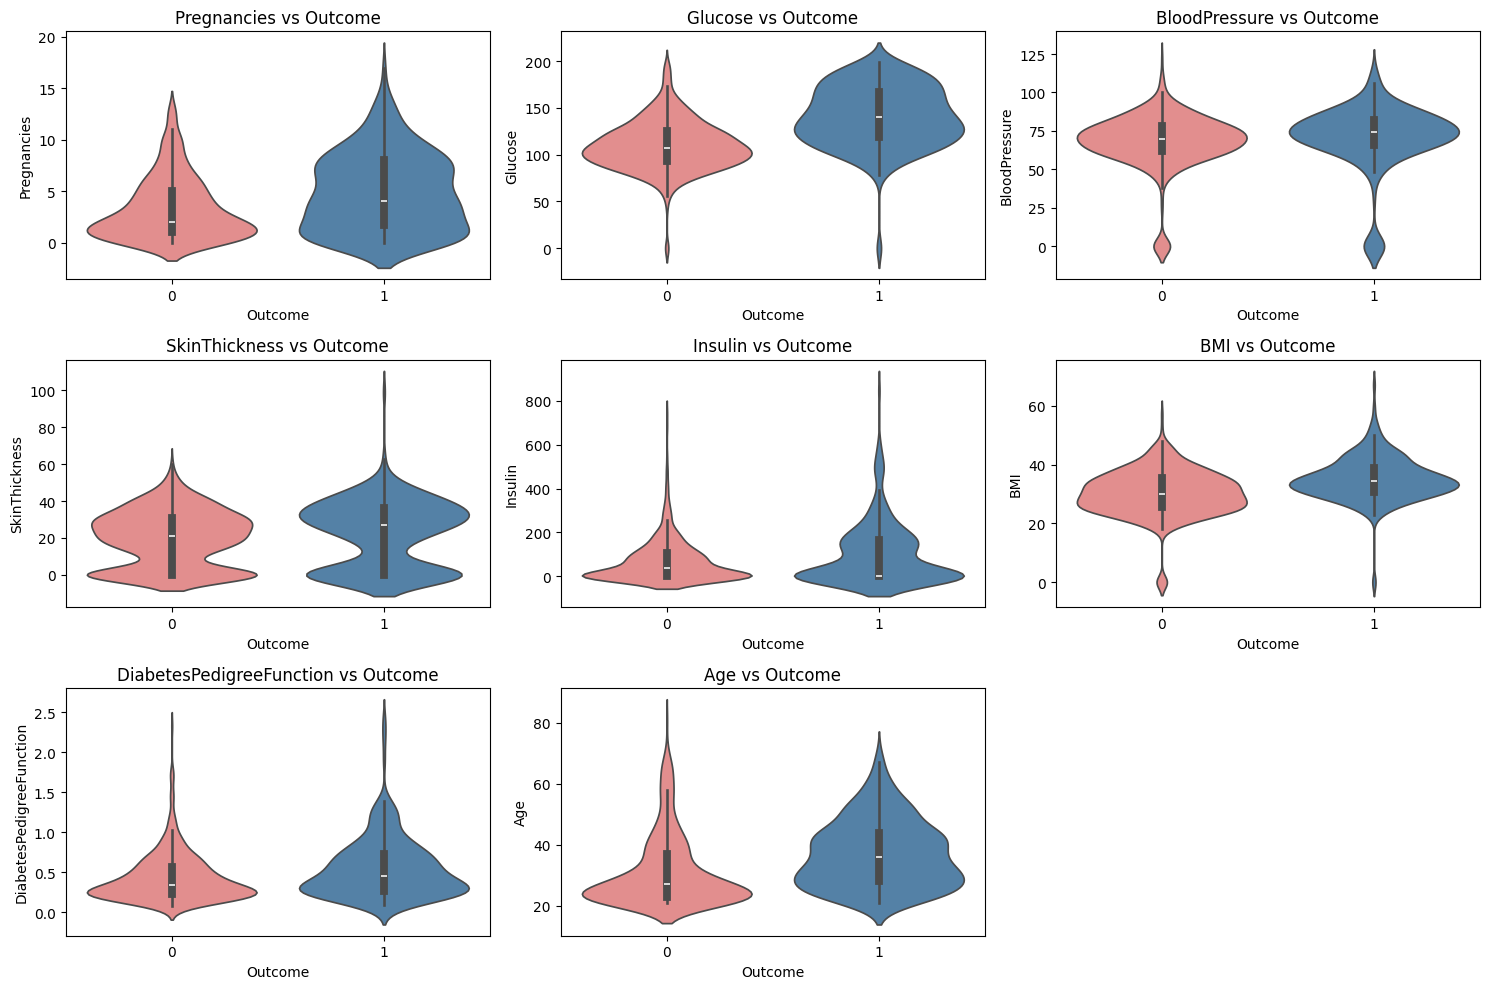

In [37]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load Dataset
df = pd.read_csv("C:/Users/dell/Documents/GitHub/Diabetes-Prediction-Model/Data/Raw/diabetes.csv")

# Display basic information
print(df.info())
print(df.describe())

# Visualizing Distribution of Features
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 8), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for Feature Interactions
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"])
plt.show()

# Boxplots to Detect Outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette=['lightcoral', 'steelblue'])
plt.title("Distribution of Diabetic vs. Non-Diabetic")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

# Violin plots for feature comparison
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='Outcome', y=col, data=df, palette=['lightcoral', 'steelblue'])
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()
